In [3]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('proj1.ok')

Assignment: proj1
OK, version v1.13.11



# Project 1: Food Safety 
## Cleaning and Exploring Data with Pandas
## Due Date: Tuesday 07/02, 11:59 PM
## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the project, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.

**Collaborators**: *list collaborators here*


## This Assignment
<img src="scoreCard.jpg" width=400>

In this project, you will investigate restaurant food safety scores for restaurants in San Francisco. Above is a sample score card for a restaurant. The scores and violation information have been made available by the San Francisco Department of Public Health. The main goal for this assignment is to understand how restaurants are scored. We will walk through various steps of exploratory data analysis to do this. We will provide comments and insights along the way to give you a sense of how we arrive at each discovery and what next steps it leads to.

As we clean and explore these data, you will gain practice with:
* Reading simple csv files
* Working with data at different levels of granularity
* Identifying the type of data collected, missing values, anomalies, etc.
* Applying probability sampling techniques
* Exploring characteristics and distributions of individual variables

## Score Breakdown
Question | Points
--- | ---
1a | 1
1b | 0
1c | 0
1d | 3
1e | 1
2a | 1
2b | 2
3a | 2
3b | 0
3c | 2
3d | 1
3e | 1
3f | 1
4a | 1
4b | 1
4c | 1
4d | 1
4e | 1
4f | 1
4g | 2
4h | 1
4i | 1
5a | 2
5b | 3
6a | 1
6b | 1
6c | 1
7a | 2
7b | 3
7c | 3
8a | 2
8b | 2
8c | 6
8d | 2
8e | 3
Total | 56

To start the assignment, run the cell below to set up some imports and the automatic tests that we will need for this assignment:

In many of these assignments (and your future adventures as a data scientist) you will use `os`, `zipfile`, `pandas`, `numpy`, `matplotlib.pyplot`, and optionally `seaborn`.  

1. Import each of these libraries `as` their commonly used abbreviations (e.g., `pd`, `np`, `plt`, and `sns`).  
1. Don't forget to include `%matplotlib inline` which enables [inline matploblib plots](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib). 
1. If you want to use `seaborn`, add the line `sns.set()` to make your plots look nicer.

In [4]:
import numpy as np
import zipfile
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import sys

assert 'zipfile'in sys.modules
assert 'pandas'in sys.modules and pd
assert 'numpy'in sys.modules and np
assert 'matplotlib'in sys.modules and plt

## Downloading the Data

For this assignment, we need this data file: http://www.ds100.org/sp19/assets/datasets/proj1-SFBusinesses.zip

We could write a few lines of code that are built to download this specific data file, but it's a better idea to have a general function that we can reuse for all of our assignments. Since this class isn't really about the nuances of the Python file system libraries, we've provided a function for you in ds100_utils.py called `fetch_and_cache` that can download files from the internet.

This function has the following arguments:
- data_url: the web address to download
- file: the file in which to save the results
- data_dir: (default="data") the location to save the data
- force: if true the file is always re-downloaded 

The way this function works is that it checks to see if `data_dir/file` already exists. If it does not exist already or if `force=True`, the file at `data_url` is downloaded and placed at `data_dir/file`. The process of storing a data file for reuse later is called caching. If `data_dir/file` already and exists `force=False`, nothing is downloaded, and instead a message is printed letting you know the date of the cached file.

The function returns a `pathlib.Path` object representing the location of the file ([pathlib docs](https://docs.python.org/3/library/pathlib.html#basic-use)). 

In [6]:
import ds100_utils
source_data_url = 'http://www.ds100.org/sp19/assets/datasets/proj1-SFBusinesses.zip'
target_file_name = 'data.zip'

# Change the force=False -> force=True in case you need to force redownload the data
dest_path = ds100_utils.fetch_and_cache(
    data_url=source_data_url, 
    data_dir='.', 
    file=target_file_name, 
    force=True)

Downloading... Done!


After running the cell above, if you list the contents of the directory containing this notebook, you should see `data.zip`.

In [7]:
!ls .

data		proj1.ipynb  __pycache__  q8d.png	 test.tplx
data.zip	proj1.ok     q7a.png	  scoreCard.jpg
ds100_utils.py	proj1.pdf    q8c2.png	  tests


---
## 0. Before You Start

For all the assignments with programming practices, please write down your answer in the answer cell(s) right below the question. 

We understand that it is helpful to have extra cells breaking down the process towards reaching your final answer. If you happen to create new cells below your answer to run codes, **NEVER** add cells between a question cell and the answer cell below it. It will cause errors in running Autograder, and sometimes fail to generate the PDF file.


## 1: Loading Food Safety Data

We have data, but we don't have any specific questions about the data yet, so let's focus on understanding the structure of the data. This involves answering questions such as:

* Is the data in a standard format or encoding?
* Is the data organized in records?
* What are the fields in each record?

Let's start by looking at the contents of `data.zip`. It's not just a single file, but a compressed directory of multiple files. We could inspect it by uncompressing it using a shell command such as `!unzip data.zip`, but in this project we're going to do almost everything in Python for maximum portability.

### Question 1a: Looking Inside and Extracting the Zip Files

Assign `my_zip` to a `Zipfile.zipfile` object representing `data.zip`, and assign `list_files` to a list of all the names of the files in `data.zip`.

*Hint*: The [Python docs](https://docs.python.org/3/library/zipfile.html) describe how to create a `zipfile.ZipFile` object. You might also look back at the code from lecture and lab. It's OK to copy and paste code from previous assignments and demos, though you might get more out of this exercise if you type out an answer.

<!--
BEGIN QUESTION
name: q1a
points: 1
-->

In [8]:
my_zip = zipfile.ZipFile(dest_path,'r')
list_names = my_zip.namelist()
list_names

['violations.csv', 'businesses.csv', 'inspections.csv', 'legend.csv']

In [9]:
ok.grade("q1a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



In your answer above, if you have written something like `zipfile.ZipFile('data.zip', ...)`, we suggest changing it to read `zipfile.ZipFile(dest_path, ...)`. In general, we **strongly suggest having your filenames hard coded as string literals only once** in a notebook. It is very dangerous to hard code things twice, because if you change one but forget to change the other, you can end up with bugs that are very hard to find.

Now display the files' names and their sizes.

If you're not sure how to proceed, read about the attributes of a `ZipFile` object in the Python docs linked above.

In [10]:
...

Ellipsis

Often when working with zipped data, we'll never unzip the actual zipfile. This saves space on our local computer. However, for this project, the files are small, so we're just going to unzip everything. This has the added benefit that you can look inside the csv files using a text editor, which might be handy for understanding what's going on. The cell below will unzip the csv files into a subdirectory called `data`. Just run it.

In [11]:
from pathlib import Path
data_dir = Path('data')
my_zip.extractall(data_dir)
!ls {data_dir}

businesses.csv	inspections.csv  legend.csv  violations.csv


The cell above created a folder called `data`, and in it there should be four CSV files. Open up `legend.csv` to see its contents. Click on 'Jupyter' in the top left, then navigate to su19/proj/proj1/data/ and click on `legend.csv`. The file will open up in another tab. You should see something that looks like:

    "Minimum_Score","Maximum_Score","Description"
    0,70,"Poor"
    71,85,"Needs Improvement"
    86,90,"Adequate"
    91,100,"Good"

### Question 1b: Programatically Looking Inside the Files

The `legend.csv` file does indeed look like a well-formed CSV file. Let's check the other three files. Rather than opening up each file manually, let's use Python to print out the first 5 lines of each. The `ds100_utils` library has a method called `head` that will allow you to retrieve the first N lines of a file as a list. For example `ds100_utils.head('data/legend.csv', 5)` will return the first 5 lines of "data/legend.csv". Try using this function to print out the first 5 lines of all four files that we just extracted from the zipfile.

In [12]:
ds100_utils.head('data/businesses.csv', 5)
ds100_utils.head('data/inspections.csv', 5)
ds100_utils.head('data/legend.csv', 5)
ds100_utils.head('data/violations.csv',5)

['"business_id","date","description"\n',
 '19,"20171211","Inadequate food safety knowledge or lack of certified food safety manager"\n',
 '19,"20171211","Unapproved or unmaintained equipment or utensils"\n',
 '19,"20160513","Unapproved or unmaintained equipment or utensils  [ date violation corrected: 12/11/2017 ]"\n',
 '19,"20160513","Unclean or degraded floors walls or ceilings  [ date violation corrected: 12/11/2017 ]"\n']

### Question 1c: Reading in the Files

Based on the above information, let's attempt to load `businesses.csv`, `inspections.csv`, and `violations.csv` into pandas data frames with the following names: `bus`, `ins`, and `vio` respectively.

*Note:* Because of character encoding issues one of the files (`bus`) will require an additional argument `encoding='ISO-8859-1'` when calling `pd.read_csv`. One day you should read all about [character encodings](https://www.diveinto.org/python3/strings.html).

In [13]:
# path to directory containing data
dsDir = Path('data')
bus = pd.read_csv(dsDir/'businesses.csv',encoding='ISO-8859-1')
ins = pd.read_csv(dsDir/'inspections.csv')
vio = pd.read_csv(dsDir/'violations.csv')


Now that you've read in the files, let's try some `pd.DataFrame` methods ([docs](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.html)).
Use the `DataFrame.head` method to show the top few lines of the `bus`, `ins`, and `vio` dataframes. To show multiple return outputs in one single cell, you can use `display()`. Use `Dataframe.describe` to learn about the numeric columns.

In [14]:
display(bus,ins,vio)

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440
5,54,RHODA GOLDMAN PLAZA,2180 POST ST,San Francisco,CA,94115,37.784626,-122.437734,+14153455060
6,56,CAFE X + O,1799 CHURCH ST,San Francisco,CA,94131,37.742325,-122.426476,+14158263535
7,58,OASIS GRILL,91 DRUMM ST,San Francisco,CA,94111,37.794483,-122.396584,+14158341942
8,61,CHOWDERS,PIER 39 SPACE A3,San Francisco,CA,94133,37.808240,-122.410189,+14153914737
9,66,STARBUCKS COFFEE,1800 IRVING ST,San Francisco,CA,94122,37.763578,-122.477461,+14152427970


,business_id,score,date,type
0,19,94,20160513,routine
1,19,94,20171211,routine
2,24,98,20171101,routine
3,24,98,20161005,routine
4,24,96,20160311,routine
5,31,98,20151204,routine
6,45,78,20160104,routine
7,45,88,20170307,routine
8,45,85,20170914,routine
9,45,84,20160614,routine


,business_id,date,description
0,19,20171211,Inadequate food safety knowledge or lack of ce...
1,19,20171211,Unapproved or unmaintained equipment or utensils
2,19,20160513,Unapproved or unmaintained equipment or utensi...
3,19,20160513,Unclean or degraded floors walls or ceilings ...
4,19,20160513,Food safety certificate or food handler card n...
5,24,20171101,Improper food storage
6,24,20161005,Unclean or degraded floors walls or ceilings ...
7,24,20160311,Unclean or degraded floors walls or ceilings ...
8,24,20160311,Unclean or degraded floors walls or ceilings ...
9,31,20151204,Food safety certificate or food handler card n...


The `DataFrame.describe` method can also be handy for computing summaries of various statistics of our dataframes. Try it out with each of our 3 dataframes.

In [15]:
bus.describe()
ins.describe()
vio.describe()

,business_id,date
count,39042.000000,3.904200e+04
mean,45674.440244,2.016283e+07
std,34172.433276,7.874679e+03
min,19.000000,2.015013e+07
25%,4959.000000,2.016031e+07
50%,62060.000000,2.016092e+07
75%,77681.000000,2.017063e+07
max,94231.000000,2.018012e+07


Now, we perform some sanity checks for you to verify that you loaded the data with the right structure. Run the following cells to load some basic utilities (you do not need to change these at all):

First, we check the basic structure of the data frames you created:

In [16]:
assert all(bus.columns == ['business_id', 'name', 'address', 'city', 'state', 'postal_code',
                           'latitude', 'longitude', 'phone_number'])
assert 6400 <= len(bus) <= 6420

assert all(ins.columns == ['business_id', 'score', 'date', 'type'])
assert 14210 <= len(ins) <= 14250

assert all(vio.columns == ['business_id', 'date', 'description'])
assert 39020 <= len(vio) <= 39080

Next we'll check that the statistics match what we expect. The following are hard-coded statistical summaries of the correct data.

In [17]:
bus_summary = pd.DataFrame(**{'columns': ['business_id', 'latitude', 'longitude'],
 'data': {'business_id': {'50%': 68294.5, 'max': 94574.0, 'min': 19.0},
  'latitude': {'50%': 37.780435, 'max': 37.824494, 'min': 37.668824},
  'longitude': {'50%': -122.41885450000001,
   'max': -122.368257,
   'min': -122.510896}},
 'index': ['min', '50%', 'max']})

ins_summary = pd.DataFrame(**{'columns': ['business_id', 'score'],
 'data': {'business_id': {'50%': 61462.0, 'max': 94231.0, 'min': 19.0},
  'score': {'50%': 92.0, 'max': 100.0, 'min': 48.0}},
 'index': ['min', '50%', 'max']})

vio_summary = pd.DataFrame(**{'columns': ['business_id'],
 'data': {'business_id': {'50%': 62060.0, 'max': 94231.0, 'min': 19.0}},
 'index': ['min', '50%', 'max']})

from IPython.display import display

print('What we expect from your Businesses dataframe:')
display(bus_summary)
print('What we expect from your Inspections dataframe:')
display(ins_summary)
print('What we expect from your Violations dataframe:')
display(vio_summary)

What we expect from your Businesses dataframe:


,business_id,latitude,longitude
min,19.0,37.668824,-122.510896
50%,68294.5,37.780435,-122.418855
max,94574.0,37.824494,-122.368257


What we expect from your Inspections dataframe:


,business_id,score
min,19.0,48.0
50%,61462.0,92.0
max,94231.0,100.0


What we expect from your Violations dataframe:


,business_id
min,19.0
50%,62060.0
max,94231.0


The code below defines a testing function that we'll use to verify that your data has the same statistics as what we expect. Run these cells to define the function. The `df_allclose` function has this name because we are verifying that all of the statistics for your dataframe are close to the expected values. Why not `df_allequal`? It's a bad idea in almost all cases to compare two floating point values like 37.780435, as rounding error can cause spurious failures.

## Question 1d: Verifying the data

Now let's run the automated tests. If your dataframes are correct, then the following cell will seem to do nothing, which is a good thing! However, if your variables don't match the correct answers in the main summary statistics shown above, an exception will be raised.

<!--
BEGIN QUESTION
name: q1d
points: 3
-->

In [18]:
"""Run this cell to load this utility comparison function that we will use in various
tests below (both tests you can see and those we run internally for grading).

Do not modify the function in any way.
"""


def df_allclose(actual, desired, columns=None, rtol=5e-2):
    """Compare selected columns of two dataframes on a few summary statistics.
    
    Compute the min, median and max of the two dataframes on the given columns, and compare
    that they match numerically to the given relative tolerance.
    
    If they don't match, an AssertionError is raised (by `numpy.testing`).
    """    
    # summary statistics to compare on
    stats = ['min', '50%', 'max']
    
    # For the desired values, we can provide a full DF with the same structure as
    # the actual data, or pre-computed summary statistics.
    # We assume a pre-computed summary was provided if columns is None. In that case, 
    # `desired` *must* have the same structure as the actual's summary
    if columns is None:
        des = desired
        columns = desired.columns
    else:
        des = desired[columns].describe().loc[stats]

    # Extract summary stats from actual DF
    act = actual[columns].describe().loc[stats]

    return np.allclose(act, des, rtol)

In [19]:
ok.grade("q1d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



### Question 1e: Identifying Issues with the Data

In [20]:
vio.head()
bus.head()
ins.head()

,business_id,score,date,type
0,19,94,20160513,routine
1,19,94,20171211,routine
2,24,98,20171101,routine
3,24,98,20161005,routine
4,24,96,20160311,routine


Use the `head` command on your three files again. This time, describe at least one potential problem with the data you see. Consider issues with missing values and bad data.

<!--
BEGIN QUESTION
name: q1e
manual: True
points: 1
-->
<!-- EXPORT TO PDF -->

1.'bus'dataframe: <br><br>1)the formats of address are not consistent. <br><br>Some mention which floor they locate in, while others don't mention, such as'1200 VAN NESS AVE, 3RD FLOOR' and '2801 LEAVENWORTH ST'.<br><br>2)there are missing values in the column 'phone_number' and they are shown in 'NaN'.<br><br>3)missing value in the column 'postal_code' and other abnormal formats of postcode, such as 'CA','Ca' and 9-digit postcode.

We will explore each file in turn, including determining its granularity and primary keys and exploring many of the variables individually. Let's begin with the businesses file, which has been read into the `bus` dataframe.

---
## 2: Examining the Business Data

From its name alone, we expect the `businesses.csv` file to contain information about the restaurants. Let's investigate the granularity of this dataset.

**Important note: From now on, the local autograder tests will not be comprehensive. You can pass the automated tests in your notebook but still fail tests in the autograder.** Please be sure to check your results carefully.

### Question 2a

Examining the entries in `bus`, is the `business_id` unique for each record that is each row of data? Your code should compute the answer, i.e. don't just hard code `True` or `False`.

Hint: use `value_counts()` or `unique()` to determine if the `business_id` series has any duplicates.

<!--
BEGIN QUESTION
name: q2a
points: 1
-->

In [21]:
is_business_id_unique = (len(bus['business_id'])-len(bus['business_id'].unique())==0)
is_business_id_unique

True

In [22]:
ok.grade("q2a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 2b

With this information, you can address the question of granularity. Answer the questions below.

1. What does each record represent (e.g., a business, a restaurant, a location, etc.)?  
1. What is the primary key?
1. What would you find by grouping by the following columns: `business_id`, `name`, `address` each individually?

Please write your answer in the markdown cell below. You may create new cells below your answer to run code, but **please never add cells between a question cell and the answer cell below it.**

<!--
BEGIN QUESTION
name: q2b
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

1. Each record represents a restaurant and its relative information, such as business_id, name, address, location (city, state, lattitude and longtitude), postcode,and phone number<br><br>
2. the primary key is the 'business_id'<br><br>
3. 
1)when grouping by 'business_id', the size of the id is 6406, meaning there are 6406 restaurants in the dataframe. Also, all the id are unique.<br><br>
2)when grouping by 'name', the size of the restaurant names is 5758, smaller than the size of the id, however, because there are no missing values in the 'name' column and some names have been used by more than 1 restaurants, therefore, the amount of groups is less than the amount of id. <br><br>
3)when grouping by 'address', the size of the address column is 5626, smaller than the size of the id, that's because some restaurants have the same address;also,some address don't specify its spccific location but say "various location"

---
## 3: Zip Codes

Next, let's  explore some of the variables in the business table. We begin by examining the postal code.

### Question 3a

Answer the following questions about the `postal code` column in the `bus` data frame?  
1. Are ZIP codes quantitative or qualitative? If qualitative, is it ordinal or nominal? 
1. What data type is used to represent a ZIP code?

*Note*: ZIP codes and postal codes are the same thing.

<!--
BEGIN QUESTION
name: q3a
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

1.Qualitative and nominal.<br><br>2.String

In [23]:
bus['postal_code'].isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
6376    False
6377    False
6378    False
6379    False
6380    False
6381    False
6382    False
6383    False
6384    False
6385    False
6386    False
6387     True
6388    False
6389    False
6390    False
6391    False
6392    False
6393    False
6394    False
6395    False
6396    False
6397    False
6398    False
6399    False
6400    False
6401    False
6402    False
6403    False
6404    False
6405    False
Name: postal_code, Length: 6406, dtype: bool

### Question 3b

How many restaurants are in each ZIP code? 

In the cell below, create a series where the index is the postal code and the value is the number of records with that postal code in descending order of count. 94110 should be at the top with a count of 596. You may want to use `.size()` or `.value_counts()`. 

<!--
BEGIN QUESTION
name: q3b
points: 0
-->

In [24]:
zip_counts = bus["postal_code"].value_counts()
zip_counts

94110        596
94103        552
94102        462
94107        460
94133        426
94109        380
94111        277
94122        273
94118        249
94115        243
94105        232
94108        228
94114        223
94117        204
94112        195
94124        191
94123        173
94121        160
94104        139
94132        133
94116         99
94134         77
94127         71
94131         49
94158         32
94130          7
94143          5
94188          4
00000          2
94014          2
94101          2
CA             2
94013          2
94129          2
Ca             1
64110          1
94120          1
94080          1
94621          1
94544          1
94602          1
95105          1
941102019      1
94545          1
92672          1
94066          1
941            1
941033148      1
Name: postal_code, dtype: int64

Did you take into account that some businesses have missing ZIP codes?

In [25]:
print('zip_counts describes', sum(zip_counts), 'records.')
print('The original data have', len(bus), 'records')

zip_counts describes 6166 records.
The original data have 6406 records


Missing data is extremely common in real-world data science projects. There are several ways to include missing postal codes in the `zip_counts` series above. One approach is to use the `fillna` method of the series, which will replace all null (a.k.a. NaN) values with a string of our choosing. In the example below, we picked "?????". When you run the code below, you should see that there are 240 businesses with missing zip code.

In [26]:
zip_counts = bus.fillna("?????").groupby("postal_code").size().sort_values(ascending=False)
zip_counts.head(15)

postal_code
94110    596
94103    552
94102    462
94107    460
94133    426
94109    380
94111    277
94122    273
94118    249
94115    243
?????    240
94105    232
94108    228
94114    223
94117    204
dtype: int64

An alternate approach is to use the DataFrame `value_counts` method with the optional argument `dropna=False`, which will ensure that null values are counted. In this case, the index will be `NaN` for the row corresponding to a null postal code.

In [27]:
bus["postal_code"].value_counts(dropna=False).sort_values(ascending = False).head(15)

94110    596
94103    552
94102    462
94107    460
94133    426
94109    380
94111    277
94122    273
94118    249
94115    243
NaN      240
94105    232
94108    228
94114    223
94117    204
Name: postal_code, dtype: int64

Missing zip codes aren't our only problem. There are also some records where the postal code is wrong, e.g., there are 3 'Ca' and 3 'CA' values. Additionally, there are some extended postal codes that are 9 digits long, rather than the typical 5 digits. We will dive deeper into problems with postal code entries in subsequent questions. 

For now, let's clean up the extended zip codes by dropping the digits beyond the first 5. Rather than deleting or replacing the old values in the `postal_code` columnm, we'll instead create a new column called `postal_code_5`.

The reason we're making a new column is that it's typically good practice to keep the original values when we are manipulating data. This makes it easier to recover from mistakes, and also makes it more clear that we are not working with the original raw data.

In [28]:
bus['postal_code_5'] = bus['postal_code'].str[:5]
bus.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262,94109
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494,94104
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN,94133
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051,94110
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440,94122


### Question 3c : A Closer Look at Missing ZIP Codes

Let's look more closely at records with missing ZIP codes. Describe why some records have missing postal codes.  Pay attention to their addresses. You will need to look at many entries, not just the first five.

*Hint*: The `isnull` method of a series returns a boolean series which is true only for entries in the original series that were missing.

<!--
BEGIN QUESTION
name: q3c
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

1.Some restaurants have unclear address.<br><br>1)'OFF THE GRID' for 'PASSION PIZZA', 'JACKRABBIT', 'SENOR SISIG (#6)', 'GAGA'S ROLLIN DINER', 'BAAGAN', 'COLETTA GELATO', 'MOONRAKER MOBILE (#2)', 'THE GAME DAY TRUCK', 'DA POKE MAN', 'THE WAFFLE ROOST', 'MOBI MUNCH, INC.' and 'BAHN MI ZON'. 'OFF THE GRID' has lots of branches with different zipcodes in San Francisco, therefore, it's unclear withou specifying which location it belongs to.<br><br>2)'OTG' for 'KOME SUSHI BURRITO' and 'MAI THAI KITCHEN'. 'OTG' should not be the correct address of these two restaurants, therefore, their zipcodes are unknown.<br><br>2.Some restaurants have various locations, such as 'CANTEEN VENDING COMPANY' and 'WEST COAST VENDING & FOOD SERVICE'.<br><br>3.One restaurant has a 'PRIVATE LOCATIONS', the 'LAMAS PERUVIAN FOOD TRUCK'.

In [29]:
bus[bus['postal_code_5'].isnull()]

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
1702,8202,XIAO LOONG,250 WEST PORTAL AVENUE,San Francisco,CA,NaN,37.738616,-122.468775,+14152792647,NaN
1725,9358,EDGEWOOD CHILDREN'S CENTER,1801 VICENTE ST,San Francisco,CA,NaN,37.739083,-122.485437,NaN,NaN
1731,9582,DIMPLES,1700 POST ST.,San Francisco,CA,NaN,37.785632,-122.429794,+14155190341,NaN
1747,10011,OSHA THAI NOODLE,819 VALENCIA ST.,San Francisco,CA,NaN,37.759943,-122.421332,+14153109293,NaN
1754,10227,THE NAPPER TANDY,3200 24TH ST,San Francisco,CA,NaN,37.752581,-122.416482,+14155507510,NaN
1762,10372,BERNAL HEIGHTS NEIGBORHOOD CENTER,515 CORTLAND AVE,San Francisco,CA,NaN,37.739110,-122.416404,+14152062142,NaN
1763,10373,EL TONAYENSE #1,1717 HARRISON ST,San Francisco,CA,NaN,37.769426,-122.413446,+14155596127,NaN
1764,10376,GOOD FRIKIN CHICKEN,10 29TH ST,San Francisco,CA,NaN,37.744369,-122.420967,+14158601365,NaN
1766,10406,SUNSET YOUTH SERVICES,3918 JUDAH ST,San Francisco,CA,NaN,37.760560,-122.504027,NaN,NaN
1778,10964,ANGEL'S HOT DOGS,CORNER OF ALAMEDA AND HENRY ADAMS,San Francisco,CA,NaN,NaN,NaN,NaN,NaN


### Question 3d: Incorrect ZIP Codes

This dataset is supposed to be only about San Francisco, so let's set up a list of all San Francisco ZIP codes.

In [30]:
all_sf_zip_codes = ["94102", "94103", "94104", "94105", "94107", "94108", 
                    "94109", "94110", "94111", "94112", "94114", "94115", 
                    "94116", "94117", "94118", "94119", "94120", "94121", 
                    "94122", "94123", "94124", "94125", "94126", "94127", 
                    "94128", "94129", "94130", "94131", "94132", "94133", 
                    "94134", "94137", "94139", "94140", "94141", "94142", 
                    "94143", "94144", "94145", "94146", "94147", "94151", 
                    "94158", "94159", "94160", "94161", "94163", "94164", 
                    "94172", "94177", "94188"]

Set `weird_zip_code_businesses` equal to a new dataframe showing only rows corresponding to ZIP codes that are not valid - either not 5-digit long or not a San Francisco zip code - and not missing. Use the `postal_code_5` column.

*Hint*: The `~` operator inverts a boolean array. Use in conjunction with `isin`.

<!--
BEGIN QUESTION
name: q3d1
points: 0
-->

In [31]:
weird_zip_code_bus = bus[~bus['postal_code_5'].isin(all_sf_zip_codes)]
weird_zip_code_businesses = weird_zip_code_bus[weird_zip_code_bus['postal_code_5'].notnull()]
weird_zip_code_businesses

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
1211,5208,GOLDEN GATE YACHT CLUB,1 YACHT RD,San Francisco,CA,941,37.807878,-122.442499,+14153462628,941
1372,5755,J & J VENDING,VARIOUS LOACATIONS (17),San Francisco,CA,94545,NaN,NaN,+14156750910,94545
1373,5757,"RICO VENDING, INC",VARIOUS LOCATIONS,San Francisco,CA,94066,NaN,NaN,+14155836723,94066
2258,36547,EPIC ROASTHOUSE,PIER 26 EMBARARCADERO,San Francisco,CA,95105,37.788962,-122.387941,+14153699955,95105
2293,37167,INTERCONTINENTAL SAN FRANCISCO EMPLOYEE CAFETERIA,888 HOWARD ST 2ND FLOOR,San Francisco,CA,94013,37.781664,-122.404778,+14156166532,94013
2295,37169,INTERCONTINENTAL SAN FRANCISCO 4TH FL. KITCHEN,888 HOWARD ST 4TH FLOOR,San Francisco,CA,94013,37.781664,-122.404778,+14156166532,94013
2846,64540,LEO'S HOT DOGS,2301 MISSION ST,San Francisco,CA,CA,37.760054,-122.419166,+14152406434,CA
2852,64660,HAIGHT STREET MARKET,1530 HAIGHT ST,San Francisco,CA,92672,37.769957,-122.447533,+14152550643,92672
2857,64738,JAPACURRY,PUBLIC,San Francisco,CA,CA,37.777122,-122.419639,+14152444785,CA
2969,65856,BAMBOO ASIA,41 MONTGOMERY ST,San Francisco,CA,94101,37.774998,-122.418299,+14156246790,94101


If we were doing very serious data analysis, we might indivdually look up every one of these strange records. Let's focus on just two of them: ZIP codes 94545 and 94602. Use a search engine to identify what cities these ZIP codes appear in. Try to explain why you think these two ZIP codes appear in your dataframe. For the one with ZIP code 94602, try searching for the business name and locate its real address.
<!--
BEGIN QUESTION
name: q3d2
points: 1
manual: True
-->
<!-- EXPORT TO PDF -->

94545-Alameda county (Hayward and Russell)<br><br>
94602-Oakland<br><br>
These three cities are all very close to San Francisico, with distances from 12 miles to 30 miles. Therefore, it's easy to put these zipcodes in the category of San Francisco's zipcodes.<br><br>
Restaurant: ORBIT ROOM, Address: 1900 Market St, San Francisco, CA 94102

### Question 3e

We often want to clean the data to improve our analysis. This cleaning might include changing values for a variable or dropping records.

The value 94602 is wrong. Change it to the most reasonable correct value, using all information you have available. Modify the `postal_code_5` field using `bus['postal_code_5'].str.replace` to replace 94602.

<!--
BEGIN QUESTION
name: q3e
points: 1
-->

In [32]:
# WARNING: Be careful when uncommenting the line below, it will set the entire column to NaN unless you 
# put something to the right of the ellipses.
bus['postal_code_5'] = bus['postal_code_5'].str.replace('94602','94102')


In [33]:
ok.grade("q3e");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 3f

Now that we have corrected one of the weird postal codes, let's filter our `bus` data such that only postal codes from San Francisco remain. While we're at it, we'll also remove the businesses that are missing a postal code. As we mentioned in question 3d, filtering our postal codes in this way may not be ideal. (Fortunately, this is just a course assignment.) Use the `postal_code_5` column.

Assign `bus` to a new dataframe that has the same columns but only the rows with ZIP codes in San Francisco.

<!--
BEGIN QUESTION
name: q3f
points: 1
-->

In [34]:
bus = bus[bus['postal_code_5'].isin(all_sf_zip_codes)]
bus.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,phone_number,postal_code_5
0,19,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR",San Francisco,CA,94109,37.786848,-122.421547,+14157763262,94109
1,24,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR",San Francisco,CA,94104,37.792888,-122.403135,+14156779494,94104
2,31,NORMAN'S ICE CREAM AND FREEZES,2801 LEAVENWORTH ST,San Francisco,CA,94133,37.807155,-122.419004,NaN,94133
3,45,CHARLIE'S DELI CAFE,3202 FOLSOM ST,San Francisco,CA,94110,37.747114,-122.413641,+14156415051,94110
4,48,ART'S CAFE,747 IRVING ST,San Francisco,CA,94122,37.764013,-122.465749,+14156657440,94122


In [35]:
ok.grade("q3f");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 4: Sampling from the Business Data
We can now sample from the business data using the cleaned ZIP code data. Make sure to use `postal_code_5` instead of `postal_code` for all parts of this question.

### Question 4a

First, complete the following function `sample`, which takes an arguments a series, `series`, and a sample size, `n`, and returns a simple random sample (SRS) of size `n` from the series. Recall that in SRS, sampling is performed **without** replacement. 

The result should be a **list** of the `n` values that are in the sample.

*Hint*: Consider using [`np.random.choice`](https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.choice.html).

<!--
BEGIN QUESTION
name: q4a
points: 1
-->

In [36]:
def sample(series, n):
    # Do not change the following line of code in any way!
    # In case you delete it, it should be "np.random.seed(40)"
    np.random.seed(40)
    
    return np.random.choice(series, size = n, replace = False).tolist()

In [37]:
ok.grade("q4a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [38]:
pd.Series(range(1, 10))


0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64

In [39]:
np.random.choice(pd.Series(range(1, 10)), size = 5, replace = False).tolist()

[6, 1, 2, 5, 7]

### Question 4b
Suppose we take a SRS of 5 businesses from the business data. What is the probability that the business named AMERICANA GRILL & FOUNTAIN is in the sample?
<!--
BEGIN QUESTION
name: q4b
points: 1
-->

In [40]:
from scipy.special import comb
q4b_answer = comb(len(bus)-1,4) * comb(1, 1) / comb(len(bus),5)
q4b_answer

0.0008135372600065083

In [41]:
ok.grade("q4b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [42]:
len(bus)

6146

### Question 4c

**New content: Stratified Sampling**

In simple random sampling (SRS), every member or set of members has an equal chance to be selected in the final sample. We often use this method when we don’t have any kind of prior information about the target population.

Here, we actually do have a good amount of information about the population - address, coordinates, phone number, and postal code, etc. Let's try to use one of these information in our new sampling, by grouping the members via a specific factor/piece of information. 

Members of the population are first partitioned into groups, called **strata**, by their postal codes. Then, within each group (**stratum**), members are randomly selected into the final probability sample, which is often a simple random sample (SRS). This method is called **stratified sampling**. 

**EXAMPLE:**
In Spring 2019, there were 800 students enrolled in Data 100, each of whom signed up for 1 of the 35 sections. Now we would like to survey 120 students to hear their thoughts on the midterm exam. One of the TAs proposed to do a stratified sampling; he grouped students by their standings - freshman, sophomore, junior, senior, graduate (5 **strata** in total) - and randomly chose 24 students in each group (**stratum**), and survey these 120 students. 

Now let's try to collect a stratified random sample of business names, where each stratum consists of a postal code. Collect one business name per stratum. Assign `bus_strat_sample` to a series of business names selected by this sampling procedure. Your output should be a series with the individual business names (not lists of one element each) as the values.

Hint: You can use the `sample` function you defined earlier. Also consider using `lambda x` when applying a function to a group. 

<!--
BEGIN QUESTION
name: q4c
points: 1
-->

In [43]:
func = lambda x: sample(x, 1)[0]
bus_strat_sample = bus['name'].groupby(bus['postal_code_5']).apply(func)
bus_strat_sample.head()

postal_code_5
94102    TURK & LARKIN DELI
94103      THE CHENNAI CLUB
94104                 PLOUF
94105            JUICE SHOP
94107        BAYSIDE MARKET
Name: name, dtype: object

In [44]:
ok.grade("q4c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 4d

What is the probability that AMERICANA GRILL & FOUNTAIN is selected as part of this stratified random sampling procedure?
<!--
BEGIN QUESTION
name: q4d
points: 1
-->

In [45]:
q4d_answer = 1/len(bus[bus['postal_code_5']=='94121'])
q4d_answer

0.00625

In [46]:
ok.grade("q4d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 4e

**New content: Cluster Sampling**

Different from stratified sampling, in some cases we may not need a member from each group (stratum). Another way to utilize the information we have about the population is cluster sampling. 

In cluster sampling, the population is also first divided into groups, called **clusters**, based on prior known information. Note that in cluster sampling, every member of the population is assigned to one, and only one, cluster. A sample of clusters is then chosen, using a probability method (often simple random sampling). All members of the selected clusters will be in the final probability sample. 

**EXAMPLE:**
In Spring 2019, there were 800 students enrolled in Data 100, each of whom signed up for 1 of the 35 sections. Another TA proposed to do a cluster sampling; there were 35 sections that each has 25 seats. She randomly selected 5 sections (clusters); she didn't know how many students were there in each of these 5 sections (clusters). She ended up surveying 119 students. 


Now, let's try collect a cluster sample of business IDs, where each cluster is a postal code, with 5 clusters in the sample. Assign `bus_cluster_sample` to a series of business IDs selected by this sampling procedure. Reminder: Use the `postal_code_5` column.

Hint: Consider using [`isin`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html).

<!--
BEGIN QUESTION
name: q4e
points: 1
-->

In [47]:
unique=pd.unique(bus['postal_code_5'])
bus_cluster_sample = bus[bus['postal_code_5'].isin(sample(unique,5))]['business_id']
bus_cluster_sample.head()

2      31
8      61
18     98
25    125
36    190
Name: business_id, dtype: int64

In [48]:
ok.grade("q4e");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [49]:
unique

array(['94109', '94104', '94133', '94110', '94122', '94115', '94131',
       '94111', '94117', '94107', '94108', '94102', '94103', '94132',
       '94105', '94134', '94124', '94116', '94121', '94118', '94112',
       '94123', '94114', '94127', '94158', '94130', '94120', '94143',
       '94188', '94129'], dtype=object)

### Question 4f
What is the probability that AMERICANA GRILL & FOUNTAIN is selected as part of this cluster sampling procedure?
<!--
BEGIN QUESTION
name: q4f
points: 1
-->

In [50]:
q4f_answer = comb(len(bus.groupby(bus['postal_code_5']).size())-1,4) * comb(1,1)/comb(len(bus.groupby(bus['postal_code_5']).size()), 5)
q4f_answer

0.16666666666666666

In [51]:
ok.grade("q4f");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [52]:
len(bus.groupby(bus['postal_code_5']).size())


30

### Question 4g
In the context of this question, what are the benefit(s) you can think of performing SRS over stratified sampling? what about stratified sampling over cluster sampling? Why would you consider performing one sampling method over another? Compare the strengths and weaknesses of these three sampling techniques.
<!--
BEGIN QUESTION
name: q4g
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

1.The benefit(s) performing SRS over stratified sampling:<br><br>it's easy to use for extracting a research sample of business names from the whole; There's no need to divide the whole dataframe into groups and each element in the dataframe has an equal probability to be selected.<br><br>
2.The benefit(s) performing stratified sampling over cluster sampling:<br> <br>it considers all the groups of business names grouped by postcodes, making it more precise. Since the homogeneity within each group is increased after stratification, the variation is reduced, and the sampling error of each group is reduced. <br><br>Instead, the cluster sampling might not contain all groups from the whole; when the sample amount is constant, because the sample unit is not widely dispersed in the whole, the sampling error of the cluster sampling is generally larger than the SRS.
<br><br>
3.Depending on the purpose of my project, I will consider the method that fits it.<br><br>
SRS:<br><br>
1>Strengths:<br><br>ease of use, and the accuracy of representation<br><br>
2>Weaknesses:<br><br>When dealing with a large population of data, it's hard to number them; and it's difficult to implement in actual work;<br><br>
Stratified sampling:<br><br>
1>Strenghs:<br><br> 1)Since the homogeneity within the group is increased after stratification, the variation is reduced, and the sampling error of each group is reduced;<br><br> 2)Different sampling methods can be applied to different groups based on the difference of each group;<br><br>3)Independent analysis of each group become feasible. <br><br>
2>Weaknesses:<br><br>If the grouping features are not properly selected, the variation inside thhe group might become large, and the inter-group variation might become small. Then the sampling error will still be large.<br><br>
Cluster sampling:<br><br>
1>Strenghs:<br><br>it's easy to organize surveys; it's easy for quality control; It's less expensive in survey costs;<br><br>
2>Weaknesses: <br><br>when the sample amount is constant, because the sample unit is not widely dispersed in the whole, the sampling error of the cluster sampling is generally larger than the SRS.



### Question 4h
Collect a multi-stage sample. First, take a SRS of 5 postal codes. You should have 5 unique postal codes after this. Then, collect an SRS of one business name per selected postal code. Assign `bus_multi_sample` to a series of names selected by this procedure. You may need to sort your result by `postal_code_5` in an ascending order. 

Similar to 4c, try using the individual businesses names as the values of the series instead of lists of one business name each.

<!--
BEGIN QUESTION
name: q4h
points: 1
-->

In [53]:
np.random.seed(40) # Do not touch this!
#postal_series = (bus['postal_code_5'].groupby(bus['postal_code_5']).size().to_frame(name = 'post').reset_index())['postal_code_5']
postal_series = pd.unique(bus['postal_code_5'])
sample_list = sample(postal_series, 5)
sample_dataframe = bus[bus['postal_code_5'].isin(sample_list)].sort_values(by=['postal_code_5'],ascending = True)
bus_multi_sample = sample_dataframe['name'].groupby(sample_dataframe['postal_code_5']).apply(lambda x: sample(x, 1)[0])
bus_multi_sample.head()

postal_code_5
94105                       ONIGILLY
94118                JADE CHOCOLATES
94124    MALCOLM X ELEMENTARY SCHOOL
94133           ASIA CHINESE FOOD #2
94134                  SUBWAY #31419
Name: name, dtype: object

In [54]:
ok.grade("q4h");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 4i
What is the probability that AMERICANA GRILL & FOUNTAIN is chosen in the multi-stage sample (from 4h)?

<!--
BEGIN QUESTION
name: q4i
points: 1
-->

In [55]:
q4i_answer = (comb(1,1)*comb(len(bus.groupby(bus['postal_code_5']).size())-1,4)/comb(len(bus.groupby(bus['postal_code_5']).size()),5))*(1/len(bus[bus['postal_code_5'] == '94121']))
q4i_answer

0.0010416666666666667

In [56]:
ok.grade("q4i");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



---
## 5: Latitude and Longitude

Let's also consider latitude and longitude values in the `bus` data frame and get a sense of how many are missing.

### Question 5a

How many businesses are missing longitude values?

*Hint*: Use `isnull`.

<!--
BEGIN QUESTION
name: q5a1
points: 1
-->

In [57]:
num_missing_longs = bus['longitude'].isnull().sum()
num_missing_longs

2942

In [58]:
ok.grade("q5a1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



As a somewhat contrived exercise in data manipulation, let's try to identify which ZIP codes are missing the most longitude values.

Throughout problems 5a and 5b, let's focus on only the "dense" ZIP codes of the city of San Francisco, listed below as `sf_dense_zip`.

In [59]:
sf_dense_zip = ["94102", "94103", "94104", "94105", "94107", "94108",
                "94109", "94110", "94111", "94112", "94114", "94115",
                "94116", "94117", "94118", "94121", "94122", "94123", 
                "94124", "94127", "94131", "94132", "94133", "94134"]

In the cell below, create a series where the index is `postal_code_5`, and the value is the number of businesses with missing longitudes in that ZIP code. Your series should be in descending order (the values should be in descending order). The first two rows of your answer should include postal code 94103 and 94110. Only businesses from `sf_dense_zip` should be included. 

*Hint: Start by making a new dataframe called `bus_sf` that only has businesses from `sf_dense_zip`.*

*Hint: Use `len` or `sum` to find out the output number.*

*Hint: Create a custom function to compute the number of null entries in a series, and use this function with the `agg` method.*
<!--
BEGIN QUESTION
name: q5a2
points: 1
-->

In [60]:
bus_sf = bus[bus['postal_code_5'].isin(sf_dense_zip)]
bus_sf1= bus_sf[bus_sf['longitude'].isnull()]
num_missing_in_each_zip = bus_sf1.groupby(bus['postal_code_5']).size().sort_values(ascending=False)
num_missing_in_each_zip.head()

postal_code_5
94110    294
94103    285
94107    275
94102    222
94109    171
dtype: int64

In [61]:
ok.grade("q5a2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 5b

In question 5a, we counted the number of null values per ZIP code. Reminder: we still only use the zip codes found in `sf_dense_zip`. Let's now count the proportion of null values of longitudinal coordinates.

Create a new dataframe of counts of the null and proportion of null values, storing the result in `fraction_missing_df`. It should have an index called `postal_code_5` and should also have 3 columns:

1. `count null`: The number of missing values for the zip code.
2. `count non null`: The number of present values for the zip code.
3. `fraction null`: The fraction of values that are null for the zip code.

Your data frame should be sorted by the fraction null in descending order. The first two rows of your answer should include postal code 94107 and 94124.

Recommended approach: Build three series with the appropriate names and data and then combine them into a dataframe. This will require some new syntax you may not have seen. You already have code from question 4a that computes the `null count` series.

To pursue this recommended approach, you might find these two functions useful and you aren't required to use these two:

* `rename`: Renames the values of a series.
* `pd.concat`: Can be used to combine a list of Series into a dataframe. Example: `pd.concat([s1, s2, s3], axis=1)` will combine series 1, 2, and 3 into a dataframe. Be careful about `axis=1`. 

*Hint*: You can use the divison operator to compute the ratio of two series.

*Hint*: The - operator can invert a boolean array. Or alternately, the `notnull` method can be used to create a boolean array from a series.

*Note*: An alternate approach is to create three aggregation functions and pass them in a list to the `agg` function.
<!--
BEGIN QUESTION
name: q5b
points: 3
-->

In [62]:
bus_sf2 = bus_sf[-bus_sf['longitude'].isnull()]
null = bus_sf1.groupby(bus['postal_code_5']).size()
nonnull = bus_sf2.groupby(bus['postal_code_5']).size()
fraction_null = null/(null + nonnull)
fraction_missing_df = pd.concat([null, nonnull, fraction_null],axis=1)
fraction_missing_df.columns =['count non null', 'count null', 'fraction null']
# make sure to use this name for your dataframe 
fraction_missing_df.head()

,count non null,count null,fraction null
postal_code_5,,,
94102,222,241,0.479482
94103,285,268,0.515371
94104,79,60,0.568345
94105,127,105,0.547414
94107,275,185,0.597826


In [63]:
ok.grade("q5b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



## Summary of the Business Data

Before we move on to explore the other data, let's take stock of what we have learned and the implications of our findings on future analysis. 

* We found that the business id is unique across records and so we may be able to use it as a key in joining tables. 
* We found that there are some errors with the ZIP codes. As a result, we dropped the records with ZIP codes outside of San Francisco or ones that were missing. In practive, however, we could take the time to look up the restaurant address online and fix these errors.   
* We found that there are a huge number of missing longitude (and latitude) values. Fixing would require a lot of work, but could in principle be automated for records with well-formed addresses. 

---
## 6: Investigate the Inspection Data

Let's now turn to the inspection DataFrame. Earlier, we found that `ins` has 4 columns named `business_id`, `score`, `date` and `type`.  In this section, we determine the granularity of `ins` and investigate the kinds of information provided for the inspections. 

Let's start by looking again at the first 5 rows of `ins` to see what we're working with.

In [64]:
ins.head(5)

,business_id,score,date,type
0,19,94,20160513,routine
1,19,94,20171211,routine
2,24,98,20171101,routine
3,24,98,20161005,routine
4,24,96,20160311,routine


### Question 6a
From calling `head`, we know that each row in this table corresponds to a single inspection. Let's get a sense of the total number of inspections conducted, as well as the total number of unique businesses that occur in the dataset.
<!--
BEGIN QUESTION
name: q6a
points: 1
-->

In [65]:
# The number of rows in ins
rows_in_table  = len(ins)

# The number of unique business IDs in ins.
unique_ins_ids = len(ins.groupby(ins['business_id']).groups)

In [66]:
ok.grade("q6a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6b

Next, let us examine the Series in the `ins` dataframe called `type`. From examining the first few rows of `ins`, we see that `type` takes string value, one of which is `'routine'`, presumably for a routine inspection. What other values does the inspection `type` take? How many occurrences of each value is in `ins`? What can we tell about these values? Can we use them for further analysis? If so, how?

<!--
BEGIN QUESTION
name: q6b
points: 1
manual: True
-->
<!-- EXPORT TO PDF -->

1. What other values does the inspection type take? <br><br>
'complaint'.<br><br>
2. How many occurrences of each value is in ins?<br><br>
'complaint': 1<br><br>
'routine': 14221<br><br>
3. What can we tell about these values? <br><br>
The inspections on these restaurants are mostly routine inspections, while only one inspection  was specially a complaint inspection, which means a complaint inspection is very rare.<br><br>
4. Can we use them for further analysis? If so, how?<br><br>
Yes. We can combine the 'description' of the vio dataframe with the 'type' of the ins and the location information of the restaurants from the bus dataframe to analyze the inspection results based on different locations.


### Question 6c

In this question, we're going to try to figure out what years the data span. The dates in our file are formatted as strings such as `20160503`, which are a little tricky to interpret. The ideal solution for this problem is to modify our dates so that they are in an appropriate format for analysis. 

In the cell below, we attempt to add a new column to `ins` called `new_date` which contains the `date` stored as a datetime object. This calls the `pd.to_datetime` method, which converts a series of string representations of dates (and/or times) to a series containing a datetime object.

In [67]:
ins['new_date'] = pd.to_datetime(ins['date'])
ins.head(5)

,business_id,score,date,type,new_date
0,19,94,20160513,routine,1970-01-01 00:00:00.020160513
1,19,94,20171211,routine,1970-01-01 00:00:00.020171211
2,24,98,20171101,routine,1970-01-01 00:00:00.020171101
3,24,98,20161005,routine,1970-01-01 00:00:00.020161005
4,24,96,20160311,routine,1970-01-01 00:00:00.020160311


As you'll see, the resulting `new_date` column doesn't make any sense. This is because the default behavior of the `to_datetime()` method does not properly process the passed string. We can fix this by telling `to_datetime` how to do its job by providing a format string.

In [68]:
ins['new_date'] = pd.to_datetime(ins['date'], format='%Y%m%d')
ins.head(5)

,business_id,score,date,type,new_date
0,19,94,20160513,routine,2016-05-13
1,19,94,20171211,routine,2017-12-11
2,24,98,20171101,routine,2017-11-01
3,24,98,20161005,routine,2016-10-05
4,24,96,20160311,routine,2016-03-11


This is still not ideal for our analysis, so we'll add one more column that is just equal to the year by using the `dt.year` property of the new series we just created.

In [69]:
ins['year'] = ins['new_date'].dt.year
ins.head(5)

,business_id,score,date,type,new_date,year
0,19,94,20160513,routine,2016-05-13,2016
1,19,94,20171211,routine,2017-12-11,2017
2,24,98,20171101,routine,2017-11-01,2017
3,24,98,20161005,routine,2016-10-05,2016
4,24,96,20160311,routine,2016-03-11,2016


Now that we have this handy `year` column, we can try to understand our data better.

What range of years is covered in this data set? Are there roughly the same number of inspections each year? Provide your answer in text only in the markdown cell below. If you would like show your reasoning with codes, make sure you put your code cells **below** the markdown answer cell. 

<!--
BEGIN QUESTION
name: q6c
points: 1
manual: True
-->
<!-- EXPORT TO PDF -->

1. What range of years is covered in this data set?<br>
From 2015 to 2018.<br><br>
2. Are there roughly the same number of inspections each year?<br>
The number of inspections in 2016 and 2017 are rougnly the same, where both were around 5000 times. The number of inspections in 2015 was around 3000 times. However, the number of inspections in 2018 was only 308.

In [70]:
ins.groupby(ins['year']).size()

year
2015    3305
2016    5443
2017    5166
2018     308
dtype: int64

---
## 7: Explore Inspection Scores

### Question 7a
Let's look at the distribution of inspection scores. As we saw before when we called `head` on this data frame, inspection scores appear to be integer values. The discreteness of this variable means that we can use a barplot to visualize the distribution of the inspection score. Make a bar plot of the counts of the number of inspections receiving each score. 

It should look like the image below. It does not need to look exactly the same (e.g., no grid), but make sure that all labels and axes are correct.

*Hint*: Use `plt.bar()` for plotting. See [PyPlot tutorial](http://data100.datahub.berkeley.edu/hub/user-redirect/git-sync?repo=https://github.com/DS-100/su19&subPath=lab/lab01/pyplot.ipynb) from Lab01 for other references, such as labeling.

*Note*: If you use seaborn `sns.countplot()`, you may need to manually set what to display on xticks. 

<img src="q7a.png" width=500>

<!--
BEGIN QUESTION
name: q7a
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

Text(0, 0.5, 'Count')

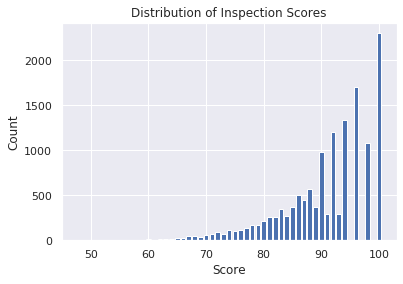

In [71]:
a = ins['type'].groupby(ins['score']).count()
a.index
plt.bar(a.index,a)
plt.title('Distribution of Inspection Scores')
plt.xlabel('Score')
plt.ylabel('Count')

In [72]:
ins.head()

,business_id,score,date,type,new_date,year
0,19,94,20160513,routine,2016-05-13,2016
1,19,94,20171211,routine,2017-12-11,2017
2,24,98,20171101,routine,2017-11-01,2017
3,24,98,20161005,routine,2016-10-05,2016
4,24,96,20160311,routine,2016-03-11,2016


### Question 7b

Describe the qualities of the distribution of the inspections scores based on your bar plot. Consider the mode(s), symmetry, tails, gaps, and anamolous values. Are there any unusual features of this distribution? What do your observations imply about the scores?

<!--
BEGIN QUESTION
name: q7b
points: 3
manual: True
-->
<!-- EXPORT TO PDF -->

1. The shape of the distribution-Skewed left<br><br>
It has distributions with fewer observations on the left. It mostly distributed from 80 to 95. From the shape of it, we can see that there are more restaurants with higher scores among the the ins dataframe<br><br>
2. Gaps. <br><br>
The figure above has three small gaps between the score from 95 to 100.<br><br>
3. Spread.<br><br>
The variability of the score is large because it covers a wide range.<br><br>
4. Center. <br><br>
The center of a distribution is around the score of 89, where about half of the observations are on either side.<br><br>
5. Mode.<br><br>
Shows a mode when score = 100.

### Question 7c

Let's figure out which restaurants had the worst scores ever (single lowest score). Let's start by creating a new dataframe called `ins_named`. It should be exactly the same as `ins`, except that it should have the name and address of every business, as determined by the `bus` dataframe. If a `business_id` in `ins` does not exist in `bus`, the name and address should be given as NaN.

*Hint*: Use the merge method to join the `ins` dataframe with the appropriate portion of the `bus` dataframe. See the official [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) on how to use `merge`.

*Note*: For quick reference, a pandas 'left' join keeps the keys from the left frame, so if ins is the left frame, all the keys from ins are kept and if a set of these keys don't have matches in the other frame, the columns from the other frame for these "unmatched" key rows contains NaNs.

<!--
BEGIN QUESTION
name: q7c1
points: 1
-->

In [74]:
left = ins
right = bus.loc[:,['business_id','name','address']]
ins_named = pd.merge(left, right,  how='left',on='business_id')
ins_named.head()

,business_id,score,date,type,new_date,year,name,address
0,19,94,20160513,routine,2016-05-13,2016,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR"
1,19,94,20171211,routine,2017-12-11,2017,NRGIZE LIFESTYLE CAFE,"1200 VAN NESS AVE, 3RD FLOOR"
2,24,98,20171101,routine,2017-11-01,2017,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR"
3,24,98,20161005,routine,2016-10-05,2016,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR"
4,24,96,20160311,routine,2016-03-11,2016,OMNI S.F. HOTEL - 2ND FLOOR PANTRY,"500 CALIFORNIA ST, 2ND FLOOR"


In [75]:
ok.grade("q7c1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



In [76]:
ins_named.sort_values(by= 'score',ascending=True).head()

,business_id,score,date,type,new_date,year,name,address
13179,86647,48,20160907,routine,2016-09-07,2016,DA CAFE,407 CLEMENT ST
9476,71373,52,20161031,routine,2016-10-31,2016,GOLDEN RIVER RESTAURANT,5827 GEARY BLVD
8885,69199,53,20170127,routine,2017-01-27,2017,MEHFIL INDIAN RESTAURANT,28 02ND ST
7104,61436,54,20150706,routine,2015-07-06,2015,OZONE THAI RESTAURANT AND LOUNGE,598 02ND ST
2192,3459,54,20150407,routine,2015-04-07,2015,BASIL THAI RESTAURANT & BAR,1175 FOLSOM ST


Using this data frame, identify the restaurant with the lowest inspection scores ever. Head to yelp.com and look up the reviews page for this restaurant. Copy and paste anything interesting you want to share.

<!--
BEGIN QUESTION
name: q7c2
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

The restaurant with the lowest inspection scores 48:DA CAFE<br><br>
Good reviews:<br><br>
1. 4.0 star rating 3/13/2019<br><br>
I was very surprised with this Boston Market. I had not been to this location for more than 10 years when I used to live in SF. My buddy wanted to stop by here before going to Safeway; I was slightly hesitant, but figured...oh well. <br>

We came here at approximately 12:00 pm. I figured it was going to be slammed, but to my surprise, it wasn't busy at all. I ordered the boneless chicken breast with stuffing and potatoes. The food and service was good. I was really shocked. I was even more shocked to learn they still had stuffing because last December, a Boston Market in Littleton, Colorado stopped serving stuffing and told me it was now seasonal. That was so upsetting. <br><br>

The service at this location was fast and good. Definitely a change from what I recall 10 years ago.<br><br>
2. 4.0 star rating 1/29/2019<br><br>
Wow it's been 25yrs since I've been here. 1st of all customer service was great the restaurant was clean the food was hot and fresh and they have more hot food options better than they did 25 years ago. lol <br>
I even asked have a sample so they let me tried their Brussels sprouts what the hell had chili sauce did you put some on there? He replied there's no hot sauce Ummmmm dude yes it did was too spicy for me. <br>
Guess what if u Sign up with texting or email you can get a coupon I would've got one if the website was working today so I called the Manager she said just come in next Monday or Tuesday and I'll take care of you.  <br>
(Thank you Mildred!)<br><br>

Mixed reviews:<br><br>
1. 3.0 star rating 6/8/2019<br><br>
My boyfriend and I ordered Boston Market from DoorDash and we were pretty satisfied - I would order again (except not the spinach!). The portions were very generous for the price and the food was all pretty good. He got the half white meat chicken in garlic herb with steamed veggies and mashed potatoes and I got the turkey dinner with mashed potatoes and creamed spinach. <br>The creamed spinach was HORRIBLE - completely inedible. It tasted like they mixed canned spinach with cream cheese and sour cream, it was super thick, gloppy and extremely sour. It was so sour that I wondered it it had gone bad. The steamed veggies were not very fresh, but they were edible. The meats were all good and the potatoes and gravy hit the spot. BM forgot to pack the side of sweet potatoes we ordered, so that was a bummer. Overall, good food for the price, just definitely skip the spinach!<br><br>
2. 3.0 star rating 4/25/2019<br><br>
The food was ok. Service was ok. Portions are good. Lemonade was great. Location is in a shady area of sf. But overall was good.<br><br>

Bad reviews:<br><br>
1. 2.0 star rating 1/25/2019<br><br>
The chicken pot pies have no flavor at all. Just terrible. The soft drinks were good so was the chocolate cake.<br><br>
2. 1.0 star rating 9/19/2018<br><br>
I usually go to the Boston Market in Gellert, but since I was in the city I decided to give this location a try. I placed a pick up order and two of the items I ordered were missing -_- I called them and asked if I could get credited for the two items since I wasn't willing to drive back but I don't think they understood me and just kept telling me to come back so they can give me a refund. I know it's partially my fault for not checking if everything was there, but there were only two people behind me in line and it wasn't crazy busy.The food is good, but because of this experience, I won't be coming back for a while.<br>

Just for fun you can also look up the restaurants with the best scores. You'll see that lots of them aren't restaurants at all!

---
## 8: Restaurant Ratings Over Time

Let's consider various scenarios involving restaurants with multiple ratings over time.

### Question 8a

Let's see which restaurant has had the most extreme improvement in its rating, aka scores. Let the "swing" of a restaurant be defined as the difference between its highest-ever and lowest-ever rating. **Only consider restaurants with at least 3 ratings, aka rated for at least 3 times (3 scores)!** Using whatever technique you want to use, assign `max_swing` to the name of restaurant that has the maximum swing.

*Note*: The "swing" is of a specific business. There might be some restaurants with multiple locations; each location has its own "swing".

<!--
BEGIN QUESTION
name: q8a1
points: 2
-->

In [77]:
def swing(x):
    if len(x)>=3:
        return max(x)-min(x)
a = ins_named.groupby(ins_named['name']).agg({'score':[swing]})
boolean=a['score']==max(a['score']['swing'])
max_swing = a[boolean['swing']].index[0]
max_swing

"JOANIE'S DINER INC."

In [78]:
ok.grade("q8a1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 8b

To get a sense of the number of times each restaurant has been inspected, create a multi-indexed dataframe called `inspections_by_id_and_year` where each row corresponds to data about a given business in a single year, and there is a single data column named `count` that represents the number of inspections for that business in that year. The first index in the MultiIndex should be on `business_id`, and the second should be on `year`.

An example row in this dataframe might look tell you that business_id is 573, year is 2017, and count is 4.

*Hint: Use groupby to group based on both the `business_id` and the `year`.*

*Hint: Use rename to change the name of the column to `count`.*

<!--
BEGIN QUESTION
name: q8b
points: 2
-->

In [79]:
inspect = ins_named.groupby([ins_named['business_id'], ins_named['year']]).count()
inspections_by_id_and_year = inspect.rename(index=str, columns={"score": 'count'}).loc[:,['count']]
inspections_by_id_and_year.head()

count
business_id year       
19          2016      1
            2017      1
24          2016      2
            2017      1
31          2015      1

In [80]:
ok.grade("q8b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



You should see that some businesses are inspected many times in a single year. Let's get a sense of the distribution of the counts of the number of inspections by calling `value_counts`. There are quite a lot of businesses with 2 inspections in the same year, so it seems like it might be interesting to see what we can learn from such businesses.

In [81]:
inspections_by_id_and_year['count'].value_counts()

1    9531
2    2175
3     111
4       2
Name: count, dtype: int64

### Question 8c

What's the relationship between the first and second scores for the businesses with 2 inspections in a year? Do they typically improve? For simplicity, let's focus on only 2016 for this problem, using `ins2016` data frame that will be created for you below. 

First, make a dataframe called `scores_pairs_by_business` indexed by `business_id` (containing only businesses with exactly 2 inspections in 2016).  This dataframe contains the field `score_pair` consisting of the score pairs **ordered chronologically**  `[first_score, second_score]`. 

Plot these scores. That is, make a scatter plot to display these pairs of scores. Include on the plot a reference line with slope 1. 

You may find the functions `sort_values`, `groupby`, `filter` and `agg` helpful, though not all necessary. 

The first few rows of the resulting table should look something like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>score_pair</th>
    </tr>
    <tr>
      <th>business_id</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>24</th>
      <td>[96, 98]</td>
    </tr>
    <tr>
      <th>45</th>
      <td>[78, 84]</td>
    </tr>
    <tr>
      <th>66</th>
      <td>[98, 100]</td>
    </tr>
    <tr>
      <th>67</th>
      <td>[87, 94]</td>
    </tr>
    <tr>
      <th>76</th>
      <td>[100, 98]</td>
    </tr>
  </tbody>
</table>

The scatter plot should look like this:

<img src="q8c2.png" width=500>

*Note: Each score pair must be a list type; numpy arrays will not pass the autograder.*

*Hint: Use the `filter` method from lecture 3 to create a new dataframe that only contains restaurants that received exactly 2 inspections.*

*Hint: Our answer is a single line of code that uses `sort_values`, `groupby`, `filter`, `groupby`, `agg`, and `rename` in that order. Your answer does not need to use these exact methods.*

<!--
BEGIN QUESTION
name: q8c1
points: 3
-->

In [82]:
# Create the dataframe here
ins2016 = ins[ins['year'] == 2016]
group2016 = ins2016.groupby(ins2016['business_id']).filter(lambda x: len(x)==2).sort_values(by=['business_id', 'new_date'])
scores_pairs_by_business = group2016['score'].groupby([group2016['business_id']]).agg(lambda x: list(x)).to_frame().rename(index=str, columns={"score": 'score_pair'})

In [83]:
ok.grade("q8c1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Now, create your scatter plot in the cell below. It does not need to look exactly the same (e.g., no grid) as the above sample, but make sure that all labels, axes and data itself are correct.

*Hint*: Use `plt.plot()` for the reference line, if you are using matplotlib.

*Hint*: Use `facecolors='none'` to make circle markers.

*Hint*: Use `zip()` function to unzip scores in the list.
<!--
BEGIN QUESTION
name: q8c2
points: 3
manual: True
-->
<!-- EXPORT TO PDF -->

Text(0, 0.5, 'Second Score')

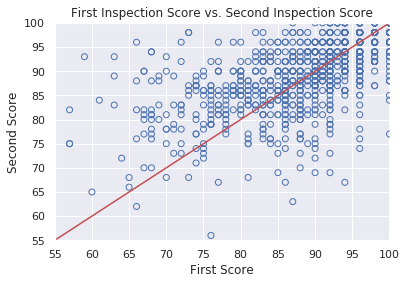

In [84]:
first = scores_pairs_by_business['score_pair'].agg(lambda x: x[0]).tolist()
second = scores_pairs_by_business['score_pair'].agg(lambda x: x[1]).tolist()
plt.scatter(first,second,facecolors='none',edgecolors='b')
plt.axis([55,100,55,100])
plt.title('First Inspection Score vs. Second Inspection Score')
plt.plot([55,100],[55,100],c='r')
plt.xlabel('First Score')
plt.ylabel('Second Score')

### Question 8d

Another way to compare the scores from the two inspections is to examine the difference in scores. Subtract the first score from the second in `scores_pairs_by_business`. Make a histogram of these differences in the scores. We might expect these differences to be positive, indicating an improvement from the first to the second inspection.

The histogram should look like this:

<img src="q8d.png" width=500>

*Hint*: Use `second_score` and `first_score` created in the scatter plot code above.

*Hint*: Convert the scores into numpy arrays to make them easier to deal with.

*Hint*: Use `plt.hist()` Try changing the number of bins when you call `plt.hist()`.

<!--
BEGIN QUESTION
name: q8d
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

In [85]:
newlist.reset_index().head()

NameError: name 'newlist' is not defined

In [ ]:
newlist['diff'] = newlist['second']-newlist['first']

In [ ]:
n = newlist.reset_index()

In [ ]:
n1 = n['business_id'].groupby(n['diff']).count()
plt.ylim(0, 200)
plt.xlabel('Score Difference (Second Score-First Score)')
plt.ylabel('Count')
plt.axis([-30,30,0,200])
plt.title('Distribution of Score Differences')
plt.hist(n['diff'],bins=30)

### Question 8e

If a restaurant's score improves from the first to the second inspection, what do you expect to see in the scatter plot that you made in question 8c? What do you see?

If a restaurant's score improves from the first to the second inspection, how would this be reflected in the histogram of the difference in the scores that you made in question 8d? What do you see?

<!--
BEGIN QUESTION
name: q8e
points: 3
manual: True
-->
<!-- EXPORT TO PDF -->

1. If a restaurant's score improves from the first to the second inspection, what do you expect to see in the scatter plot that you made in question 8c? What do you see?<br><br>
I expect to see that the datapoints should be mostly above the reference line. <br>From the graph above, the amount of datapoints on the both side of the reference line is similar.<br><br>
2. If a restaurant's score improves from the first to the second inspection, how would this be reflected in the histogram of the difference in the scores that you made in question 8d? What do you see?<br><br>
The count of the positive score difference should increase and the height of that bin would be higher. <br>From the graph, half of the restaurants had lower scores during their second inspection than their first inspection. <br>The mode is at diff=0, meaning 200 restaurants didn't change their scores from the first to the second inspection.

## Summary of the Inspections Data

What we have learned about the inspections data? What might be some next steps in our investigation? 

* We found that the records are at the inspection level and that we have inspections for multiple years.   
* We also found that many restaurants have more than one inspection a year. 
* By joining the business and inspection data, we identified the name of the restaurant with the worst rating and optionally the names of the restaurants with the best rating.
* We identified the restaurant that had the largest swing in rating over time.
* We also examined the relationship between the scores when a restaurant has multiple inspections in a year. Our findings were a bit counterintuitive and may warrant further investigation. 


## Congratulations!

You are finished with Project 1. You'll need to make sure that your PDF exports correctly to receive credit. Run the following cell and follow the instructions.

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

<!-- EXPECT 14 EXPORTED QUESTIONS -->

In [ ]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('proj1.ipynb', 'proj1.pdf')
ok.submit()